🌳 Decision Tree:-

A Decision Tree is a popular supervised machine learning algorithm used for both classification and regression tasks. It works like a flowchart where:

-->Each internal node represents a decision based on a feature.

-->Each branch represents the outcome of that decision.

-->Each leaf node represents a final prediction (class label or value).

🔁 Pros and Cons:-

Pros:

-->Easy to understand and visualize.

-->No need for feature scaling.

-->Handles both numerical and categorical data.

Cons:

-->Prone to overfitting.

-->Unstable to small changes in data.

-->Biased towards features with more levels.


In [1]:
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeClassifier
import pandas as pd 
import seaborn as sns

In [2]:
data=pd.read_csv('diabetes.csv')

In [3]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<Axes: >

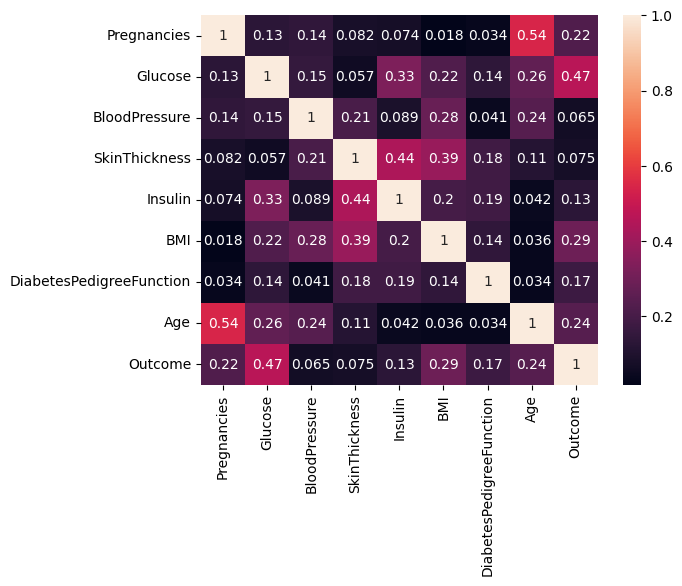

In [5]:
sns.heatmap(data.corr().abs(),annot=True)

<Axes: xlabel='Outcome', ylabel='count'>

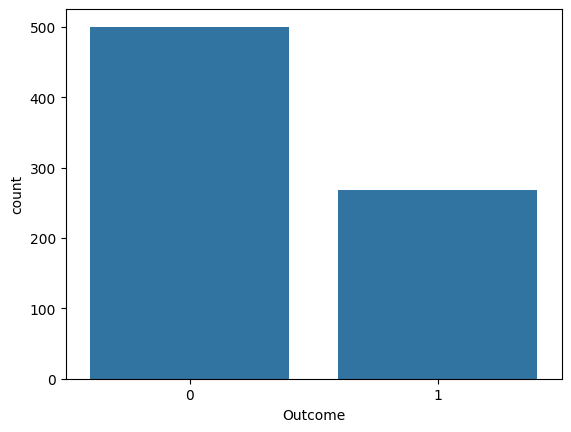

In [6]:
sns.countplot(data,x='Outcome')

In [7]:
X=data.drop(columns=['Outcome'])
y=data['Outcome']

In [8]:
from imblearn.over_sampling import SMOTE
from collections import Counter
oversample = SMOTE()
X_resampled, y_resampled = oversample.fit_resample(X, y)
counter_resampled = Counter(y_resampled)
print(counter_resampled)

Counter({1: 500, 0: 500})


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.2, random_state=42)

In [11]:
model=DecisionTreeClassifier(max_depth=10,min_samples_split=50)

In [12]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=50)

In [16]:
print(model.score(x_train,y_train))

0.845


In [17]:
print(model.score(x_test,y_test))

0.71


In [19]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_train,model.predict(x_train)))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       401
           1       0.88      0.79      0.84       399

    accuracy                           0.84       800
   macro avg       0.85      0.84      0.84       800
weighted avg       0.85      0.84      0.84       800



In [20]:
print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.69      0.76      0.72        99
           1       0.74      0.66      0.70       101

    accuracy                           0.71       200
   macro avg       0.71      0.71      0.71       200
weighted avg       0.71      0.71      0.71       200



In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
clf = RandomForestClassifier(1000,min_samples_split=10)
clf.fit(x_train,y_train)

RandomForestClassifier(min_samples_split=10, n_estimators=1000)

In [23]:
print(classification_report(y_train,clf.predict(x_train)))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       401
           1       0.95      0.96      0.95       399

    accuracy                           0.95       800
   macro avg       0.95      0.95      0.95       800
weighted avg       0.95      0.95      0.95       800



In [24]:
print(classification_report(y_test,clf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79        99
           1       0.78      0.83      0.80       101

    accuracy                           0.80       200
   macro avg       0.80      0.79      0.79       200
weighted avg       0.80      0.80      0.79       200

